In [22]:
import os
import shutil
import numpy as np
import pandas as pd   
from sklearn.model_selection import train_test_split   

In [23]:
!unzip Data.zip

Archive:  Data.zip
   creating: Data/
  inflating: __MACOSX/._Data         
   creating: Data/hypodontia/
  inflating: __MACOSX/Data/._hypodontia  
  inflating: Data/.DS_Store          
  inflating: __MACOSX/Data/._.DS_Store  
   creating: Data/Tooth Discoloration/
  inflating: __MACOSX/Data/._Tooth Discoloration  
   creating: Data/Ulcer/
  inflating: __MACOSX/Data/._Ulcer   
   creating: Data/Gingivitis/
  inflating: __MACOSX/Data/._Gingivitis  
   creating: Data/Caries/
  inflating: __MACOSX/Data/._Caries  
   creating: Data/Calculus/
  inflating: __MACOSX/Data/._Calculus  
  inflating: Data/hypodontia/(819).jpg  
  inflating: __MACOSX/Data/hypodontia/._(819).jpg  
  inflating: Data/hypodontia/(1007).JPG  
  inflating: __MACOSX/Data/hypodontia/._(1007).JPG  
  inflating: Data/hypodontia/(24).JPG  
  inflating: __MACOSX/Data/hypodontia/._(24).JPG  
  inflating: Data/hypodontia/(1142).JPG  
  inflating: __MACOSX/Data/hypodontia/._(1142).JPG  
  inflating: Data/hypodontia/(726).JPG  
 

In [24]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split

# Define paths
data_dir = 'Data'
train_dir = 'Train'
val_dir = 'Val'
test_dir = 'Test'

# Create directories for the split data
for directory in [train_dir, val_dir, test_dir]:
    if not os.path.exists(directory):
        os.makedirs(directory)

# Function to split data
def split_data(class_dir, train_dir, val_dir, test_dir, test_size=0.20):
    # Get filenames
    files = os.listdir(class_dir)
    train_files, test_files = train_test_split(files, test_size=test_size, random_state=42)
    test_files, val_files = train_test_split(test_files, test_size=0.50, random_state=42)

    # Copy files to train, val, and test directories
    for file in train_files:
        shutil.copy(os.path.join(class_dir, file), os.path.join(train_dir, file))
    for file in val_files:
        shutil.copy(os.path.join(class_dir, file), os.path.join(val_dir, file))
    for file in test_files:
        shutil.copy(os.path.join(class_dir, file), os.path.join(test_dir, file))

# Iterate over each class and split the data
classes = ['Calculus', 'Caries', 'Gingivitis', 'hypodontia', 'Ulcer', 'Tooth Discoloration']
for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)

    # Create class directories in train, val, and test
    for directory in [train_dir, val_dir, test_dir]:
        class_directory = os.path.join(directory, class_name)
        if not os.path.exists(class_directory):
            os.makedirs(class_directory)

    # Split and copy files
    split_data(class_dir, os.path.join(train_dir, class_name), os.path.join(val_dir, class_name), os.path.join(test_dir, class_name))

print("Data split into train, validation, and test sets.")

Data split into train, validation, and test sets.


In [25]:
# Directory paths
train_dir = 'Train'
val_dir = 'Val'
test_dir = 'Test'

# Classes
classes = ['Calculus', 'Caries', 'Gingivitis', 'hypodontia', 'Ulcer', 'Tooth Discoloration']

# Function to calculate size of each class
def calculate_class_sizes(dir_path, classes):
    return {class_name: len(os.listdir(os.path.join(dir_path, class_name))) for class_name in classes}

# Calculate sizes
train_sizes = calculate_class_sizes(train_dir, classes)
val_sizes = calculate_class_sizes(val_dir, classes)
test_sizes = calculate_class_sizes(test_dir, classes)

# Calculate total images in each set
total_train = sum(train_sizes.values())
total_val = sum(val_sizes.values())
total_test = sum(test_sizes.values())

# Printing stats
print(f"Training Set: {total_train} images")
for class_name, size in train_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_train:.2%} of train set)")

print(f"\nValidation Set: {total_val} images")
for class_name, size in val_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_val:.2%} of val set)")

print(f"\nTest Set: {total_test} images")
for class_name, size in test_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_test:.2%} of test set)")

Training Set: 4448 images
 - Calculus: 1036 images (23.29% of train set)
 - Caries: 175 images (3.93% of train set)
 - Gingivitis: 1879 images (42.24% of train set)
 - hypodontia: 1000 images (22.48% of train set)
 - Ulcer: 212 images (4.77% of train set)
 - Tooth Discoloration: 146 images (3.28% of train set)

Validation Set: 559 images
 - Calculus: 130 images (23.26% of val set)
 - Caries: 22 images (3.94% of val set)
 - Gingivitis: 235 images (42.04% of val set)
 - hypodontia: 126 images (22.54% of val set)
 - Ulcer: 27 images (4.83% of val set)
 - Tooth Discoloration: 19 images (3.40% of val set)

Test Set: 556 images
 - Calculus: 130 images (23.38% of test set)
 - Caries: 22 images (3.96% of test set)
 - Gingivitis: 235 images (42.27% of test set)
 - hypodontia: 125 images (22.48% of test set)
 - Ulcer: 26 images (4.68% of test set)
 - Tooth Discoloration: 18 images (3.24% of test set)


/var/folders/hn/5fpc0nwn3l5dqrb9wq8zr_w80000gn/T/ipykernel_19354/2005837930.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(class_names, rotation=45, ha='right')


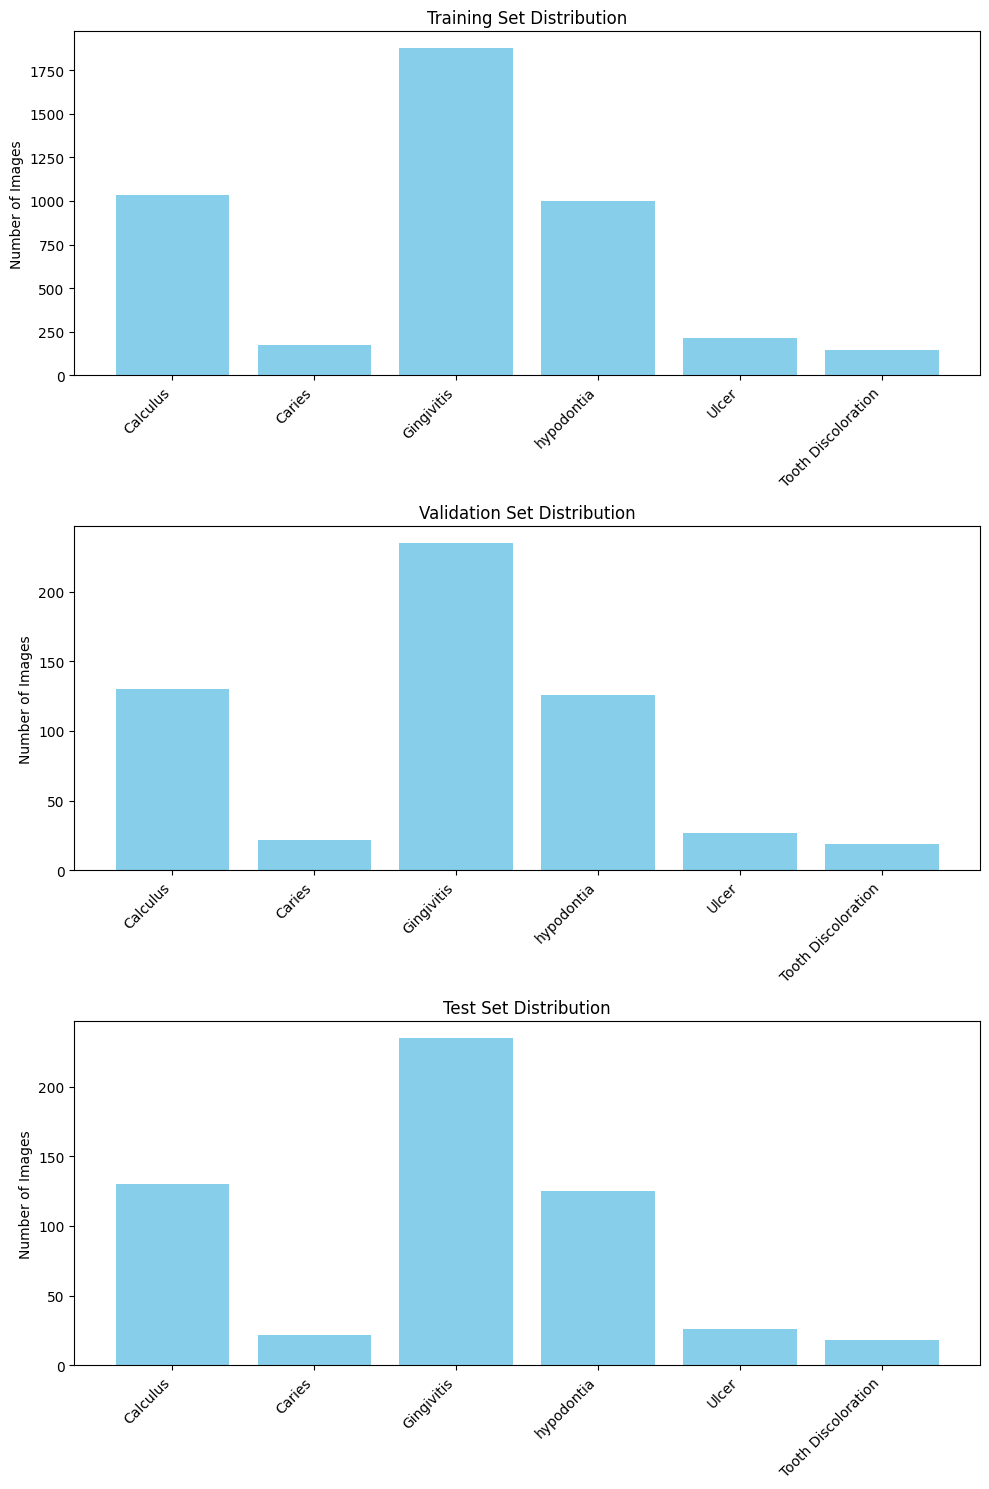

In [26]:
import matplotlib.pyplot as plt

# Assuming the sizes are already calculated as in your previous code
# train_sizes, val_sizes, test_sizes

# Data for plotting
class_names = list(train_sizes.keys())
train_counts = list(train_sizes.values())
val_counts = list(val_sizes.values())
test_counts = list(test_sizes.values())

# Function to create a bar plot
def create_bar_plot(ax, counts, title):
    ax.bar(class_names, counts, color='skyblue')
    ax.set_title(title)
    ax.set_xticklabels(class_names, rotation=45, ha='right')
    ax.set_ylabel('Number of Images')

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot data
create_bar_plot(axes[0], train_counts, 'Training Set Distribution')
create_bar_plot(axes[1], val_counts, 'Validation Set Distribution')
create_bar_plot(axes[2], test_counts, 'Test Set Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

In [27]:
#pip install keras

In [28]:
#pip install tensorflow

In [29]:
import random
import tensorflow as tf        
import keras 
from keras.preprocessing.image import ImageDataGenerator 

train_dir = 'Train'

# Function to perform oversampling
def oversample_class(class_dir, target_count):
    files = os.listdir(class_dir)
    while len(files) < target_count:
        chosen_file = random.choice(files)
        new_file = f'oversampled_{random.randint(1, 10000)}_{chosen_file}'
        shutil.copy(os.path.join(class_dir, chosen_file), os.path.join(class_dir, new_file))
        files.append(new_file)

target_counts = {
    'Caries': 1000,
    'Ulcer': 1000,
    'Tooth Discoloration': 1000
}

for class_name, target_count in target_counts.items():
    class_dir = os.path.join(train_dir, class_name)
    oversample_class(class_dir, target_count)


In [30]:
# Calculate sizes
train_sizes = calculate_class_sizes(train_dir, classes)
val_sizes = calculate_class_sizes(val_dir, classes)
test_sizes = calculate_class_sizes(test_dir, classes)

# Calculate total images in each set
total_train = sum(train_sizes.values())
total_val = sum(val_sizes.values())
total_test = sum(test_sizes.values())

# Printing stats
print(f"Training Set: {total_train} images")
for class_name, size in train_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_train:.2%} of train set)")

print(f"\nValidation Set: {total_val} images")
for class_name, size in val_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_val:.2%} of val set)")

print(f"\nTest Set: {total_test} images")
for class_name, size in test_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_test:.2%} of test set)")

Training Set: 6915 images
 - Calculus: 1036 images (14.98% of train set)
 - Caries: 1000 images (14.46% of train set)
 - Gingivitis: 1879 images (27.17% of train set)
 - hypodontia: 1000 images (14.46% of train set)
 - Ulcer: 1000 images (14.46% of train set)
 - Tooth Discoloration: 1000 images (14.46% of train set)

Validation Set: 559 images
 - Calculus: 130 images (23.26% of val set)
 - Caries: 22 images (3.94% of val set)
 - Gingivitis: 235 images (42.04% of val set)
 - hypodontia: 126 images (22.54% of val set)
 - Ulcer: 27 images (4.83% of val set)
 - Tooth Discoloration: 19 images (3.40% of val set)

Test Set: 556 images
 - Calculus: 130 images (23.38% of test set)
 - Caries: 22 images (3.96% of test set)
 - Gingivitis: 235 images (42.27% of test set)
 - hypodontia: 125 images (22.48% of test set)
 - Ulcer: 26 images (4.68% of test set)
 - Tooth Discoloration: 18 images (3.24% of test set)


In [31]:
import tensorflow as tf

'''

# Define augmentation settings
data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


def augment_class_images(class_dir, augment_times, is_underrepresented):
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = tf.keras.preprocessing.image.load_img(img_path)
        img = tf.keras.preprocessing.image.img_to_array(img)
        img = img.reshape((1,) + img.shape)  # Reshape image

        # Adjust augmentation times for underrepresented classes
        if is_underrepresented:
            actual_augment_times = augment_times
        else:
            actual_augment_times = augment_times // 4  # Reduce for well-represented classes

        # Generate augmented images
        i = 0
        for batch in data_gen.flow(img, batch_size=1, save_to_dir=class_dir, save_prefix='aug', save_format='jpeg'):
            i += 1
            if i >= actual_augment_times:
                break

# Define which classes are underrepresented
underrepresented_classes = ['Caries', 'Ulcer', 'Tooth Discoloration']

# Apply augmentation
for class_name in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, class_name)
    is_underrepresented = class_name in underrepresented_classes
    augment_class_images(class_dir, augment_times=2, is_underrepresented=is_underrepresented)

    '''

"\n\n# Define augmentation settings\ndata_gen = ImageDataGenerator(\n    rotation_range=20,\n    width_shift_range=0.2,\n    height_shift_range=0.2,\n    shear_range=0.2,\n    zoom_range=0.2,\n    horizontal_flip=True,\n    fill_mode='nearest'\n)\n\n\ndef augment_class_images(class_dir, augment_times, is_underrepresented):\n    for img_name in os.listdir(class_dir):\n        img_path = os.path.join(class_dir, img_name)\n        img = tf.keras.preprocessing.image.load_img(img_path)\n        img = tf.keras.preprocessing.image.img_to_array(img)\n        img = img.reshape((1,) + img.shape)  # Reshape image\n\n        # Adjust augmentation times for underrepresented classes\n        if is_underrepresented:\n            actual_augment_times = augment_times\n        else:\n            actual_augment_times = augment_times // 4  # Reduce for well-represented classes\n\n        # Generate augmented images\n        i = 0\n        for batch in data_gen.flow(img, batch_size=1, save_to_dir=class_dir

In [32]:
# Calculate sizes
train_sizes = calculate_class_sizes(train_dir, classes)
val_sizes = calculate_class_sizes(val_dir, classes)
test_sizes = calculate_class_sizes(test_dir, classes)

# Calculate total images in each set
total_train = sum(train_sizes.values())
total_val = sum(val_sizes.values())
total_test = sum(test_sizes.values())

# Printing stats
print(f"Training Set: {total_train} images")
for class_name, size in train_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_train:.2%} of train set)")

print(f"\nValidation Set: {total_val} images")
for class_name, size in val_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_val:.2%} of val set)")

print(f"\nTest Set: {total_test} images")
for class_name, size in test_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_test:.2%} of test set)")

Training Set: 6915 images
 - Calculus: 1036 images (14.98% of train set)
 - Caries: 1000 images (14.46% of train set)
 - Gingivitis: 1879 images (27.17% of train set)
 - hypodontia: 1000 images (14.46% of train set)
 - Ulcer: 1000 images (14.46% of train set)
 - Tooth Discoloration: 1000 images (14.46% of train set)

Validation Set: 559 images
 - Calculus: 130 images (23.26% of val set)
 - Caries: 22 images (3.94% of val set)
 - Gingivitis: 235 images (42.04% of val set)
 - hypodontia: 126 images (22.54% of val set)
 - Ulcer: 27 images (4.83% of val set)
 - Tooth Discoloration: 19 images (3.40% of val set)

Test Set: 556 images
 - Calculus: 130 images (23.38% of test set)
 - Caries: 22 images (3.96% of test set)
 - Gingivitis: 235 images (42.27% of test set)
 - hypodontia: 125 images (22.48% of test set)
 - Ulcer: 26 images (4.68% of test set)
 - Tooth Discoloration: 18 images (3.24% of test set)


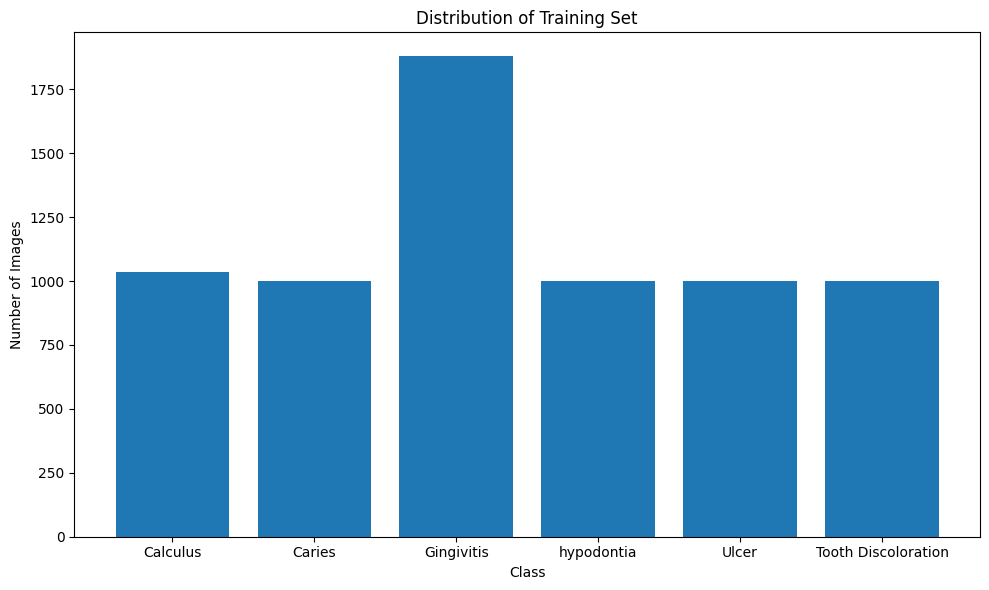

In [33]:
train_counts = list(train_sizes.values())

plt.figure(figsize=(10, 6))
plt.bar(classes, train_counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Training Set')
plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image

def display_images(image_paths, cols=3, rows=2, figsize=(15, 10)):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()
    for img_path, ax in zip(image_paths, axes):
        img = Image.open(img_path)
        ax.imshow(img)
        ax.set_title(os.path.basename(os.path.dirname(img_path)))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

data_dir = 'Train'
num_images_to_display = 3  # Number of images to display for each class

for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        image_files = os.listdir(class_dir)
        selected_images = random.sample(image_files, min(len(image_files), num_images_to_display))
        selected_image_paths = [os.path.join(class_dir, img) for img in selected_images]
        display_images(selected_image_paths, cols=num_images_to_display, rows=1)

In [35]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from PIL import Image

def load_images(data_dir, size=(64, 64)):
    images = []
    labels = []
    class_names = os.listdir(data_dir)

    for class_name in class_names:
        class_dir = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_dir):
            continue

        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = Image.open(img_path).convert('RGB')
            img = img.resize(size)
            images.append(np.array(img).flatten())
            labels.append(class_names.index(class_name))

    return np.array(images), np.array(labels), class_names

# Load and preprocess the data
data_dir = 'Train'  # Replace with your dataset directory
X, y, class_names = load_images(data_dir)

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


# Logistic Regression Model (as an example of a simpler model)
log_reg_model = LogisticRegression(max_iter=1000, solver= 'saga')
log_reg_model.fit(X_train_pca, y_train)
y_pred_lr = log_reg_model.predict(X_test_pca)
print("Logistic Regression Model Performance:")
print(classification_report(y_test, y_pred_lr, target_names=class_names))

'''

# SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_pca, y_train)
y_pred_svm = svm_model.predict(X_test_pca)
print("SVM Model Performance:")
print(classification_report(y_test, y_pred_svm, target_names=class_names))

'''

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_pca, y_train)
y_pred_rf = rf_model.predict(X_test_pca)
print("Random Forest Model Performance:")
print(classification_report(y_test, y_pred_rf, target_names=class_names))

Logistic Regression Model Performance:
                     precision    recall  f1-score   support

         hypodontia       0.80      0.69      0.74       203
Tooth Discoloration       0.83      0.93      0.88       211
              Ulcer       0.88      0.97      0.92       195
         Gingivitis       0.69      0.60      0.64       366
             Caries       0.82      0.91      0.87       195
           Calculus       0.52      0.54      0.53       213

           accuracy                           0.75      1383
          macro avg       0.76      0.77      0.76      1383
       weighted avg       0.75      0.75      0.75      1383

Random Forest Model Performance:
                     precision    recall  f1-score   support

         hypodontia       0.89      0.74      0.81       203
Tooth Discoloration       1.00      0.98      0.99       211
              Ulcer       1.00      0.95      0.97       195
         Gingivitis       0.65      0.80      0.71       366
         

In [36]:
import tensorflow as tf


# Define augmentation settings
data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


def augment_class_images(class_dir, augment_times, is_underrepresented):
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = tf.keras.preprocessing.image.load_img(img_path)
        img = tf.keras.preprocessing.image.img_to_array(img)
        img = img.reshape((1,) + img.shape)  # Reshape image

        # Adjust augmentation times for underrepresented classes
        if is_underrepresented:
            actual_augment_times = augment_times
        else:
            actual_augment_times = augment_times // 4  # Reduce for well-represented classes

        # Generate augmented images
        i = 0
        for batch in data_gen.flow(img, batch_size=1, save_to_dir=class_dir, save_prefix='aug', save_format='jpeg'):
            i += 1
            if i >= actual_augment_times:
                break

# Define which classes are underrepresented
underrepresented_classes = ['Caries', 'Ulcer', 'Tooth Discoloration']

# Apply augmentation
for class_name in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, class_name)
    is_underrepresented = class_name in underrepresented_classes
    augment_class_images(class_dir, augment_times=2, is_underrepresented=is_underrepresented)

In [37]:
# Calculate sizes
train_sizes = calculate_class_sizes(train_dir, classes)
val_sizes = calculate_class_sizes(val_dir, classes)
test_sizes = calculate_class_sizes(test_dir, classes)

# Calculate total images in each set
total_train = sum(train_sizes.values())
total_val = sum(val_sizes.values())
total_test = sum(test_sizes.values())

# Printing stats
print(f"Training Set: {total_train} images")
for class_name, size in train_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_train:.2%} of train set)")

print(f"\nValidation Set: {total_val} images")
for class_name, size in val_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_val:.2%} of val set)")

print(f"\nTest Set: {total_test} images")
for class_name, size in test_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_test:.2%} of test set)")

Training Set: 15943 images
 - Calculus: 2009 images (12.60% of train set)
 - Caries: 2798 images (17.55% of train set)
 - Gingivitis: 3569 images (22.39% of train set)
 - hypodontia: 1949 images (12.22% of train set)
 - Ulcer: 2812 images (17.64% of train set)
 - Tooth Discoloration: 2806 images (17.60% of train set)

Validation Set: 559 images
 - Calculus: 130 images (23.26% of val set)
 - Caries: 22 images (3.94% of val set)
 - Gingivitis: 235 images (42.04% of val set)
 - hypodontia: 126 images (22.54% of val set)
 - Ulcer: 27 images (4.83% of val set)
 - Tooth Discoloration: 19 images (3.40% of val set)

Test Set: 556 images
 - Calculus: 130 images (23.38% of test set)
 - Caries: 22 images (3.96% of test set)
 - Gingivitis: 235 images (42.27% of test set)
 - hypodontia: 125 images (22.48% of test set)
 - Ulcer: 26 images (4.68% of test set)
 - Tooth Discoloration: 18 images (3.24% of test set)


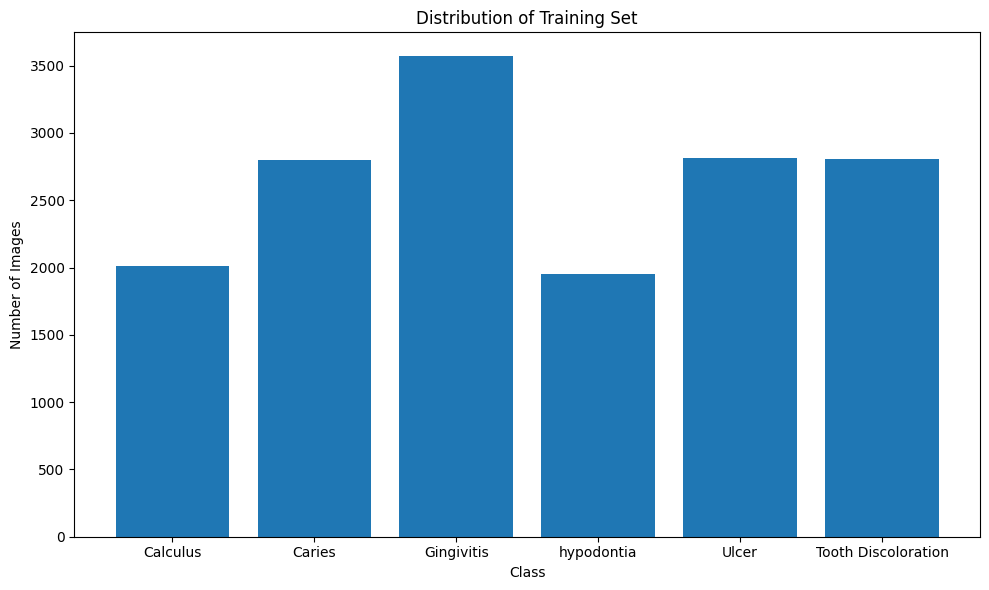

In [38]:
train_counts = list(train_sizes.values())

plt.figure(figsize=(10, 6))
plt.bar(classes, train_counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Training Set')
plt.tight_layout()
plt.show()

In [49]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

dataset = ImageFolder(root='Train', transform=transform)
loader = DataLoader(dataset, batch_size=64, shuffle=False, num_workers=4)

mean = 0.
std = 0.
nb_samples = 0.
for data, _ in loader:
    batch_samples = data.size(0)
    data = data.view(batch_samples, data.size(1), -1)
    mean += data.mean(2).sum(0)
    std += data.std(2).sum(0)
    nb_samples += batch_samples

mean /= nb_samples
std /= nb_samples

print(f'Mean: {mean}')
print(f'Std: {std}')

Mean: tensor([0.6828, 0.4591, 0.4221])
Std: tensor([0.2034, 0.2248, 0.2094])


In [55]:
import torch          
import torchvision   
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import time

# Define the CNN Architecture
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)  # Change channels to 1 if grayscale images
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 32 * 32, 512)  # Adjust the input features here based on the final output of conv layers
        self.fc2 = nn.Linear(512, 6)  # 6 classes
        self.dropout = nn.Dropout(0.25)
        self.name = "OralClassifier"

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 32 * 32)  # Adjust the features here to match the fc1 input features
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

mean = [0.6828, 0.4591, 0.4221]
std = [0.2034, 0.2248, 0.2094]

# Define the transform including resizing and normalization
common_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

# Load your training and validation datasets with these transforms
train_dataset = ImageFolder(root='Train', transform=common_transforms)
val_dataset = ImageFolder(root='Val', transform=common_transforms)


model = SimpleCNN()

In [56]:

def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path



def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_err.csv".format(path))
    val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

In [57]:

def train_model(model, batch_size=64, learning_rate=0.01, num_epochs=3):
    torch.manual_seed(1000)

    # Use GPU if available
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)



    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum= 0.9)


    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers = 3)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers= 3)

    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)

    start_time = time.time()  # Start the timer

    for epoch in range(num_epochs):  # Loop over the dataset multiple times

        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0

        # Training
        model.train()
        for i, (inputs, labels) in enumerate(train_loader):  # Iterate over the batches
            # Transfer data to the device
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train_err += (predicted != labels).sum().item()
            total_epoch += labels.size(0)

        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i + 1)

        # Validation
        total_val_loss = 0.0
        total_val_err = 0.0
        total_epoch = 0

        model.eval()
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                total_val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_val_err += (predicted != labels).sum().item()
                total_epoch += labels.size(0)

        val_err[epoch] = float(total_val_err) / total_epoch
        val_loss[epoch] = float(total_val_loss) / len(val_loader)

        print(f'Epoch {epoch + 1}/{num_epochs}, Train err: {train_err[epoch]:.4f}, Train acc: {100 - (train_err[epoch] * 100)}%, Train loss: {train_loss[epoch]:.4f}, Validation err: {val_err[epoch]:.4f}, Validation acc: {100 - (val_err[epoch] * 100)}%, Validation loss: {val_loss[epoch]:.4f}')

        model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)

    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f'Total time elapsed: {elapsed_time:.2f} seconds')

    # Save metrics
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt(f"{model_path}_train_err.csv", train_err)
    np.savetxt(f"{model_path}_train_loss.csv", train_loss)
    np.savetxt(f"{model_path}_val_err.csv", val_err)
    np.savetxt(f"{model_path}_val_loss.csv", val_loss)

In [58]:
train_model(model, batch_size=128, learning_rate=0.001, num_epochs=10)

Epoch 1/10, Train err: 0.6301, Train loss: 1.5706, Validation err: 0.4866, Validation loss: 1.2691
Epoch 2/10, Train err: 0.4985, Train loss: 1.3108, Validation err: 0.4329, Validation loss: 1.1004
Epoch 3/10, Train err: 0.4401, Train loss: 1.1442, Validation err: 0.3918, Validation loss: 0.9508
Epoch 4/10, Train err: 0.3957, Train loss: 1.0454, Validation err: 0.3649, Validation loss: 0.8749
Epoch 5/10, Train err: 0.3695, Train loss: 0.9702, Validation err: 0.3470, Validation loss: 0.8422
Epoch 6/10, Train err: 0.3299, Train loss: 0.8801, Validation err: 0.3292, Validation loss: 0.8324
Epoch 7/10, Train err: 0.3065, Train loss: 0.8188, Validation err: 0.3488, Validation loss: 0.8495
Epoch 8/10, Train err: 0.2834, Train loss: 0.7629, Validation err: 0.2719, Validation loss: 0.7072
Epoch 9/10, Train err: 0.2607, Train loss: 0.7119, Validation err: 0.2809, Validation loss: 0.7167
Epoch 10/10, Train err: 0.2398, Train loss: 0.6558, Validation err: 0.2916, Validation loss: 0.7389
Finished 

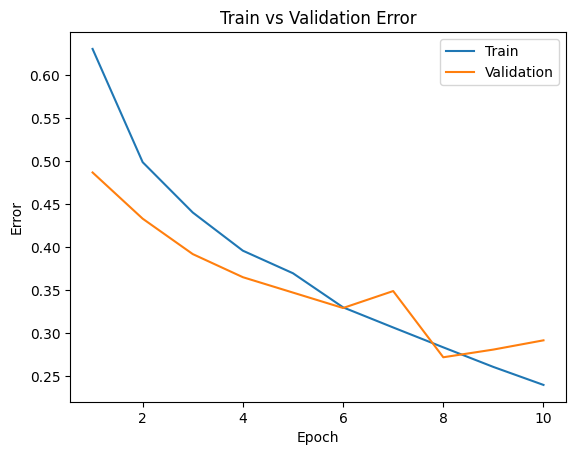

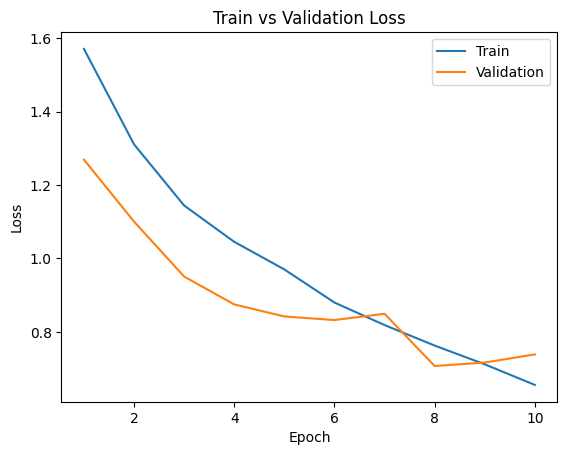

In [59]:
model_path = get_model_name("OralClassifier", batch_size= 128, learning_rate= 0.001, epoch=9)
plot_training_curve(model_path)